In [1]:
from acquire_msc import get_all_readme_files_and_languages
from acquire_msc import get_alt
from prepare_readme_files import prepare_repo_html_data
from prepare_readme_files import basic_clean

import re
import unicodedata
import pandas as pd
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind as ttest
from wordcloud import WordCloud
from afinn import Afinn

In [2]:
url_list = ['microsoft/Terminal', 'jackfrued/Python-100-Days', 
    'kkuchta/css-only-chat', 'microsoft/PowerToys', 'jolaleye/cssfx', 
    'MisterBooo/LeetCodeAnimation', 'flutter/flutter_web', 
    'TheAlgorithms/Python', 'hiroppy/fusuma', 'CyC2018/CS-Notes', 
    'jaywcjlove/linux-command', 'flutter/flutter', '996icu/996.ICU', 
    'STVIR/pysot', 'minamarkham/formation', 'azl397985856/leetcode', 
    'qianguyihao/Web', 'react-native-windows', 'sql-machine-learning/sqlflow', 
    'sabakkps/backslide', 'dgryski/go-perfbook', 'Snailclimb/JavaGuide', 
    'microsoft/vscode', 'markphelps/flipt', 'teoga/awesome-product-design',
    'dianping/cat','catchorg/Catch2', 'nyaadevs/nyaa', 'jingweno/ccat', 
    'AlexiaJM/Deep-learning-with-cats', 'sharkdp/bat', 'CleverRaven/Cataclysm-DDA', 
    'typelevel/cats', 'catboost/catboost', 'catarse/catarse', 'websockets/wscat' ,
    'udacity/ud989-cat-clicker-premium-vanilla' ,'enigmampc/catalyst' ,
    'catapult-project/catapult','cesarferreira/CatKit', 'Rogero0o/CatLoadingView', 
    'CellularPrivacy/Android-IMSI-Catcher-Detector','ZacSweers/CatchUp', 'awgn/cat', 
    'mattsears/nyan-cat-formatter', 'rancher/community-catalog', 'Oros42/IMSI-catcher',
    'Catrobat/Catroid', 'junyanz/CatPapers', 'kubernetes-incubator/service-catalog',
    'rancher/cattle', 'nolanlawson/Catlog', 'Lunat1q/Catchem-PoGo',
    'interactivethings/catalog', 'windiest/Front-end-tutorial','TeMPOraL/nyan-mode',
    'x0rz/phishing_catcher', 'scikit-learn-contrib/categorical-encoding',
    'Mr-Un1k0d3r/DKMC', 'ros/catkin', 'Catel/Catel', 'typelevel/cats-effect',
    'typelevel/cats-mtl', 'skorokithakis/catt', 'PetoiCamp/OpenCat', 'ring0lab/catphish',
    'aleju/cat-generator', 'youzan/bugCatcher', 'mbcharbonneau/UIImage-Categories',
    'maxogden/javascript-for-cats', 'underscoreio/scala-with-cats','notwaldorf/cat-dns',
    'unidal/cat2', 'Externalizable/bongo.cat', 'rancher/rancher-catalog',
    'joaotavora/sly', 'developit/snarkdown', 'eleybourn/Book-Catalogue',
    'bendytree/Objective-C-RegEx-Categories','travisbrown/iteratee',
    'tinrab/meower','funcool/cats','SophieDeBenedetto/catbook-redux', 'easychen/catgate',
    'ypwhs/dogs_vs_cats', 'notwaldorf/caturday-post', 'catalyst-team/catalyst',
    'OpenExoplanetCatalogue/open_exoplanet_catalogue', 'jbaron/cats', 'typelevel/mouse',
    'callowayproject/django-categories', 'hapijs/catbox', 'Whales/Cataclysm',
    'lunaryorn/mdcat', 'sindresorhus/cat-names', 'keefo/CATweaker',
    'honcheng/CATransform3D-Test', 'stfalcon-studio/SmsVerifyCatcher',
    'typelevel/kittens', 'jerrykrinock/CategoriesObjC', 'cemolcay/CategorySliderView',
    'X-Wei/flutter_catalog', 'CatLib/CatLib', 'calvinmetcalf/catiline',
    'konifar/material-cat', 'letiantian/another-tutorial-about-java-web',
    'tpolecat/cats-infographic', 'catberry/catberry', 'Gibbsdavidl/CatterPlots',
    'Maescool/Catacomb-Snatch', 'secabstraction/PowerCat',
    'perl-catalyst/catalyst-runtime', 'simoninithomas/CatDCGAN', 'lexiross/fattest-cat',
    'CatacombGames/Catacomb3D', 'LiskArchive/lisk-commander',
    'rancher/catalog-dockerfiles', 'opencats/OpenCATS', 'cadejscroggins/catz',
    'atnos-org/eff', 'whatthejeff/nyancat-phpunit-resultprinter', 'posva/catimg']

afinn = Afinn()

In [3]:
'''create a list of extra words and another of words to exclude from the stoplist'''
extra_words = []
exclude_words = []

articles = get_alt(url_list)
print(articles[0]['language'])
print(articles[0].keys())
transformed_data, df = prepare_repo_html_data(articles, extra_words, exclude_words)

C++
dict_keys(['title', 'language', 'content'])


In [4]:
languages = []
for i in range(df.shape[0]):
    next_lang = transformed_data[i]['language'].lower()
    next_lang = re.sub(r'[^\w\s]', ' ', next_lang).strip()
    if next_lang not in languages:
        languages.append(next_lang)

In [5]:
languages # make all lowercase with symbols

['c',
 'html',
 'ruby',
 'vue',
 'dart',
 'python',
 'css',
 'java',
 'rust',
 'go',
 'typescript',
 'scala',
 'javascript',
 'kotlin',
 'smarty',
 'lua',
 'objective c',
 'tex',
 'common lisp',
 'clojure',
 'perl',
 'jupyter notebook',
 'shell',
 'php']

In [6]:
df.language.value_counts()

JavaScript          20
Python              13
C++                  9
Java                 9
Go                   8
HTML                 8
Rust                 6
Scala                5
Common Lisp          5
Jupyter Notebook     4
Vue                  4
Dart                 4
Ruby                 4
Kotlin               4
Smarty               3
Objective-C          2
PHP                  2
TeX                  2
C#                   1
C                    1
Shell                1
TypeScript           1
CSS                  1
Clojure              1
Perl                 1
Lua                  1
Name: language, dtype: int64

In [7]:
exclude_words = df.language.unique()
exclude_words = [lang.lower() for lang in extra_words]

transformed_data, df = prepare_repo_html_data(articles, extra_words, exclude_words)

In [8]:
df

,category,clean,language,title
0,repo_readme,welcome repository contains source code window...,C++,microsoft/Terminal
1,repo_readme,python 100 python python c c python python jav...,HTML,jackfrued/Python-100-Days
2,repo_readme,css chat truly monstrous async web chat using ...,Ruby,kkuchta/css-only-chat
3,repo_readme,css chat truly monstrous async web chat using ...,Ruby,microsoft/PowerToys
4,repo_readme,beautifully simple click copy css effects http...,Vue,jolaleye/cssfx
5,repo_readme,beautifully simple click copy css effects http...,Vue,MisterBooo/LeetCodeAnimation
6,repo_readme,welcome code repository flutter web repository...,Dart,flutter/flutter_web
7,repo_readme,algorithms python algorithms implemented pytho...,Python,TheAlgorithms/Python
8,repo_readme,make slides markdown easily write markdown cre...,CSS,hiroppy/fusuma
9,repo_readme,java offer leetcode linux http socket sql leet...,Java,CyC2018/CS-Notes


In [9]:
# get percent of language use in data set
languages = pd.concat([df.language.value_counts(),
                    df.language.value_counts(normalize=True)], axis=1)
languages.columns = ['n', 'percent']
languages

,n,percent
JavaScript,20,0.166667
Python,13,0.108333
C++,9,0.075000
Java,9,0.075000
Go,8,0.066667
HTML,8,0.066667
Rust,6,0.050000
Scala,5,0.041667
Common Lisp,5,0.041667
Jupyter Notebook,4,0.033333


In [10]:
df.head(3)

,category,clean,language,title
0,repo_readme,welcome repository contains source code window...,C++,microsoft/Terminal
1,repo_readme,python 100 python python c c python python jav...,HTML,jackfrued/Python-100-Days
2,repo_readme,css chat truly monstrous async web chat using ...,Ruby,kkuchta/css-only-chat


In [11]:
# make a list of unique languages that is formatted in line with the dataframe
language_list = df.language.unique()
language_list

array(['C++', 'HTML', 'Ruby', 'Vue', 'Dart', 'Python', 'CSS', 'Java',
       'Rust', 'Go', 'TypeScript', 'Scala', 'JavaScript', 'Kotlin',
       'Smarty', 'C#', 'Lua', 'Objective-C', 'TeX', 'Common Lisp',
       'Clojure', 'Perl', 'Jupyter Notebook', 'Shell', 'PHP', 'C'],
      dtype=object)

In [12]:
df.clean[:5]

0    welcome repository contains source code window...
1    python 100 python python c c python python jav...
2    css chat truly monstrous async web chat using ...
3    css chat truly monstrous async web chat using ...
4    beautifully simple click copy css effects http...
Name: clean, dtype: object

In [13]:
# get word count and frequency for all readmes:
all_words = ' '.join(df.clean)
all_freq = pd.Series(all_words.split()).value_counts()

There are no language words in the readme files.

In [14]:
all_freq.index

Index(['c', '1', 'use', 'cats', '0', 'cat', 'license', 'code', 'project',
       'model',
       ...
       'tolerate', 'generalization', 'remote_addr', 'talktcpdumptestparm',
       'jacobowitz', 'spike', 'caturana', 'addons', 'lastly', 'secret_key'],
      dtype='object', length=6976)

In [39]:
all_freq[:10]

c          316
1          275
use        265
cats       253
0          227
cat        226
license    219
code       203
project    201
model      187
dtype: int64

In [15]:
freq_list = []
words_list = []
for lang in language_list:
    # make sure we can separate c++ and c# from c
    if lang == 'C++':
        formatted_lang = 'cplusplus'
    elif lang == 'C#':
        formatted_lang = 'csharp'
    else:
        formatted_lang = lang
    words_list.append(basic_clean(formatted_lang) + '_words')
    freq_list.append(basic_clean(formatted_lang)+ '_freq')

# make a dictionary to create values for a word list of each language
words_dict = {}
for n, lang in enumerate(words_list):
    words_dict[lang] = ' '.join(df[df.language == language_list[n]].clean)
words_dict

{'cplusplus_words': 'welcome repository contains source code windows terminal windows console host conhost exe components shared two projects colortool sample projects show consume windows console apis build status project build status terminal colortool terminal console overview please take minutes review overview diving code windows terminal windows terminal new modern feature rich productive terminal application command line users includes many features frequently requested windows command line community including support tabs rich text globalization configurability theming styling terminal also need meet goals measures ensure remains fast efficient consume vast amounts memory power windows console host windows console host conhost exe windows original command line user experience implements windows command line infrastructure responsible hosting windows console api input engine rendering engine user preferences console host code repository actual source conhost exe windows built co

In [17]:
# make a dictionary of series for frequency of words in each language
freq_dict = {}
for lang in words_list:
    freq_dict[lang] = pd.Series(words_dict[lang].split()).value_counts()

In [19]:
javascript_words = ' '.join(df[df.language == 'JavaScript'].clean)
cplusplus_words = ' '.join(df[df.language == 'C++'].clean)
python_words = ' '.join(df[df.language == 'Python'].clean)
java_words = ' '.join(df[df.language == 'Java'].clean)
go_words = ' '.join(df[df.language == 'Go'].clean)
rust_words = ' '.join(df[df.language == 'Rust'].clean)

In [20]:
javascript_freq = pd.Series(javascript_words.split()).value_counts()
cplusplus_freq = pd.Series(cplusplus_words.split()).value_counts()
python_freq = pd.Series(python_words.split()).value_counts()
java_freq = pd.Series(java_words.split()).value_counts()
go_freq = pd.Series(go_words.split()).value_counts()
rust_freq = pd.Series(rust_words.split()).value_counts()

In [22]:
word_counts = (pd.concat([all_freq, javascript_freq, cplusplus_freq, python_freq, java_freq, go_freq, rust_freq], axis=1, sort=True)
                .set_axis(['all', 'javascript', 'cplusplus', 'python', 'java', 'go', 'rust'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head().append(word_counts.tail())

,all,javascript,cplusplus,python,java,go,rust
0,227,22,9,57,3,14,8
00010,2,0,0,2,0,0,0
0010,2,0,0,2,0,0,0
0010_add_field_categoryrelation_category,2,0,0,2,0,0,0
0010_changed_category_relation,2,0,0,2,0,0,0
zoo,2,0,0,0,0,0,0
zorin,1,0,0,0,0,0,0
zou,1,0,0,0,0,0,0
zsh,5,0,0,0,0,5,0
zurich,4,4,0,0,0,0,0


In [23]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,javascript,cplusplus,python,java,go,rust
c,316,2,22,4,8,1,0
1,275,37,1,83,1,2,7
use,265,50,4,47,3,11,3
cats,253,43,0,30,0,1,0
0,227,22,9,57,3,14,8
cat,226,125,16,10,22,10,1
license,219,21,5,1,18,23,64
code,203,35,17,14,5,26,1
project,201,22,7,13,2,12,5
model,187,0,2,26,0,18,0


In [24]:
pd.concat([word_counts[word_counts.javascript == 0].sort_values(by='python').tail(6),
           word_counts[word_counts.python == 0].sort_values(by='javascript').tail(6)])

,all,javascript,cplusplus,python,java,go,rust
performance,67,0,1,41,0,2,0
algorithm,42,0,0,42,0,0,0
python,91,0,1,44,2,10,0
search,63,0,1,48,0,0,0
py,58,0,0,53,0,0,0
n,59,0,0,54,0,3,0
random,39,31,2,0,0,0,0
console,56,31,15,0,0,2,0
npm,50,32,0,0,0,0,0
catberry,40,40,0,0,0,0,0


In [29]:
#significance test to see if difference in word count:
ttest(word_counts.python, word_counts.java)

Ttest_indResult(statistic=19.669550222194967, pvalue=5.552752095294937e-85)

In [30]:
pd.concat([word_counts.sort_values(by='python').tail(6),
           word_counts.sort_values(by='javascript').tail(6),
           word_counts.sort_values(by='cplusplus').tail(6),
          word_counts.sort_values(by='java').tail(6),
          word_counts.sort_values(by='go').tail(6), 
          word_counts.sort_values(by='rust').tail(6)])

,all,javascript,cplusplus,python,java,go,rust
search,63,0,1,48,0,0,0
new,170,29,11,51,1,0,0
py,58,0,0,53,0,0,0
n,59,0,0,54,0,3,0
0,227,22,9,57,3,14,8
1,275,37,1,83,1,2,7
use,265,50,4,47,3,11,3
make,113,57,9,14,1,0,1
function,73,60,3,5,0,0,0
get,133,73,2,12,0,4,0


Text(0.5, 1.0, 'Proportion of language for the 20 most common words')

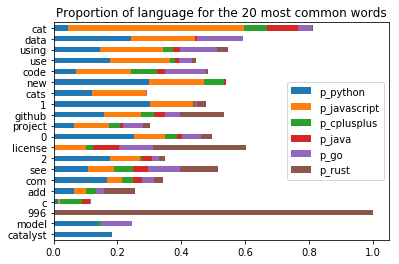

In [31]:
(word_counts
 .assign(p_python = word_counts.python / word_counts['all'],
         p_javascript = word_counts.javascript / word_counts['all'], 
         p_cplusplus = word_counts.cplusplus / word_counts['all'],
         p_java = word_counts.java / word_counts['all'], 
         p_go = word_counts.go / word_counts['all'], 
         p_rust = word_counts.rust / word_counts['all'])
 .sort_values(by='all')
 [['p_python', 'p_javascript', 'p_cplusplus', 'p_java', 'p_go', 'p_rust']]
 .tail(20)
 .sort_values('p_javascript')
 .plot.barh(stacked=True))

plt.title('Proportion of language for the 20 most common words')

In [34]:
for word in all_freq.index:
    if word in languages:
        print(word)

n


(-0.5, 799.5, 399.5, -0.5)

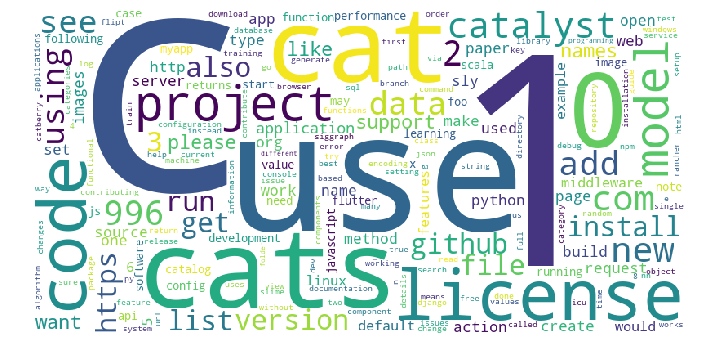

In [35]:
cloud = WordCloud(background_color='white', width=800, height=400)
all_img = cloud.generate_from_frequencies(all_freq)
plt.figure(figsize=(20, 6))
plt.imshow(all_img)
plt.axis('off')

In [36]:
df.head()

,category,clean,language,title
0,repo_readme,welcome repository contains source code window...,C++,microsoft/Terminal
1,repo_readme,python 100 python python c c python python jav...,HTML,jackfrued/Python-100-Days
2,repo_readme,css chat truly monstrous async web chat using ...,Ruby,kkuchta/css-only-chat
3,repo_readme,css chat truly monstrous async web chat using ...,Ruby,microsoft/PowerToys
4,repo_readme,beautifully simple click copy css effects http...,Vue,jolaleye/cssfx


In [43]:
all_freq[:10]

c          316
1          275
use        265
cats       253
0          227
cat        226
license    219
code       203
project    201
model      187
dtype: int64

In [ ]:
afinn.score('This is utterly excellent!')